# Preliminary Data Inspection, Exploration and Analysis
Decided to use a seperate notebook to reduce clutter and (hopefully) improve UX.

In [2]:
# import modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
# import data
df = pd.read_csv("amazon_data.csv")
df = df.drop(columns=["asin", "imgUrl", "productURL"],axis=1)
df

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...
2222737,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2222738,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2222739,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2222740,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


## Raw Data Inspection

### Data types
The dataset contains a mix of float, int, bool, and strings data types (after dropping unwanted columns). 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   title              object 
 1   stars              float64
 2   reviews            int64  
 3   price              float64
 4   isBestSeller       bool   
 5   boughtInLastMonth  int64  
 6   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 103.9+ MB


### Null Values
The dataset contains no (0) null values and thus there is no ambiguity.

In [5]:
df.isnull().sum()

title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

### Basic Statistics

In [9]:
described = df.describe().drop(axis=0, index=["std","25%","50%","75%"])
described

,stars,reviews,price,boughtInLastMonth
count,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06
mean,2.031870e+00,3.821617e+02,9.425737e+01,1.856902e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


### Categories

In [4]:
list(df.categoryName.unique())

['Hi-Fi Speakers',
 'CD, Disc & Tape Players',
 'Wearable Technology',
 'Light Bulbs',
 'Bathroom Lighting',
 'Heating, Cooling & Air Quality',
 'Coffee & Espresso Machines',
 'Lab & Scientific Products',
 'Smart Speakers',
 'Motorbike Clothing',
 'Motorbike Accessories',
 'Motorbike Batteries',
 'Motorbike Boots & Luggage',
 'Motorbike Chassis',
 'Handmade Home & Kitchen Products',
 'Hardware',
 'Storage & Home Organisation',
 'Fireplaces, Stoves & Accessories',
 'PC Gaming Accessories',
 'USB Gadgets',
 'Blank Media Cases & Wallets',
 'Car & Motorbike',
 'Boys',
 'Sports & Outdoors',
 'Microphones',
 'String Instruments',
 'Karaoke Equipment',
 'PA & Stage',
 'General Music-Making Accessories',
 'Wind Instruments',
 'Handmade Gifts',
 'Fragrances',
 'Calendars & Personal Organisers',
 'Furniture & Lighting',
 'Computer Printers',
 'Ski Goggles',
 'Snowboards',
 'Skiing Poles',
 'Downhill Ski Boots',
 'Hiking Hand & Foot Warmers',
 'Pet Supplies',
 'Plants, Seeds & Bulbs',
 'Garden Fu

In [8]:
print(f"There are {len(df.categoryName.unique())} unique categories.")

There are 296 unique categories.


## Data Exploration and Analysis
Here I look at all the numerical data to gain an understanding on the dataset. I find that from the 2+ million entries, most have 0 stars or reviews. This indicates the majority of products are just listings and do not get any sales.

From the price histogram, a clear right skew can be seen. This is the result of a few very high priced items that greatly deviate from the median. 

### Rating/Stars

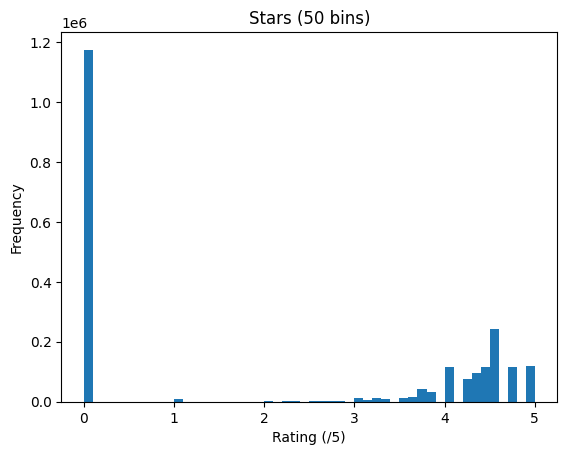

In [8]:
plt.hist(df['stars'], bins=50)

plt.title('Stars (50 bins)')
plt.xlabel("Rating (/5)")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig("Figures\Ratings.png", transparent=True)

plt.show()

### No. reviews

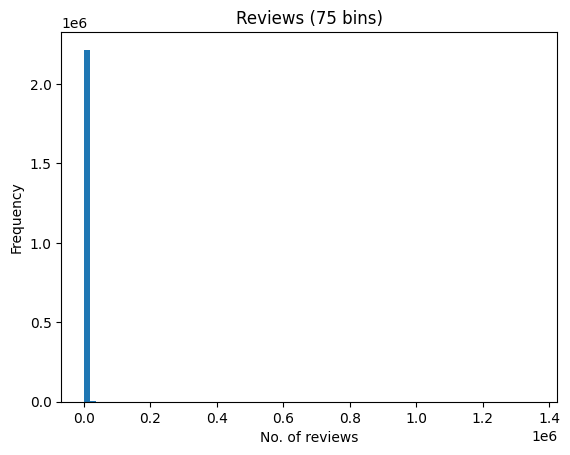

In [ ]:
b = 75
plt.hist(df['reviews'], bins=b)

plt.title(f'Reviews ({b} bins)')
plt.xlabel("No. of reviews")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig("Figures\Reviews.png", transparent=True)

plt.show()

### Prices

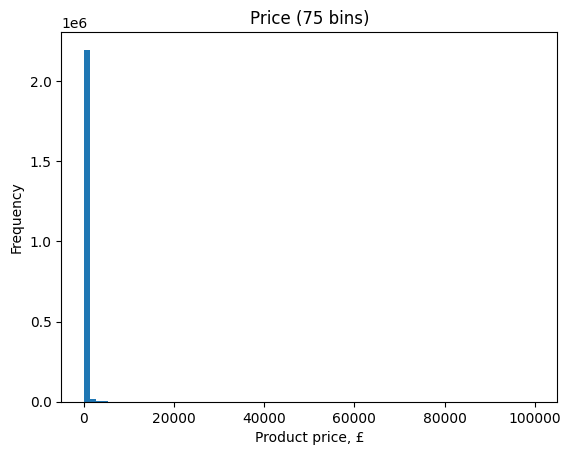

In [13]:
plt.hist(df['price'], bins=75)

plt.title('Price (75 bins)')
plt.xlabel("Product price, £")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig(r"Figures\Price.png", transparent=True)

plt.show()

### Best seller status

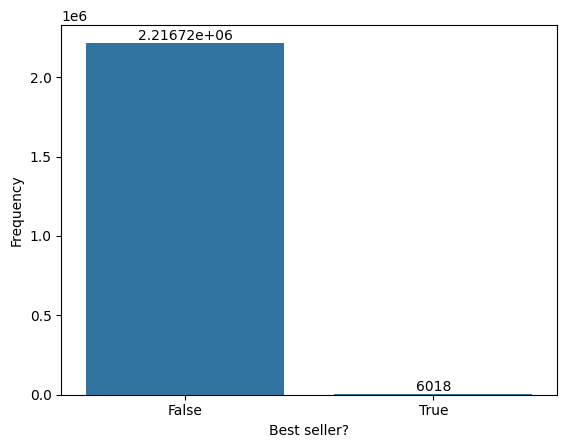

In [ ]:
barplot = sns.countplot(x='isBestSeller', data=df)
for bar in barplot.containers:
    barplot.bar_label(bar)

ax = plt.gca()

ax.set_xlabel('Best seller?')
ax.set_ylabel('Frequency')
ax.tick_params(axis='both')

# Save the countplot with a transparent background
plt.savefig(r"Figures\isBestSeller.png", transparent=True)

# Display the countplot
plt.show()

### No. purchased in the last month

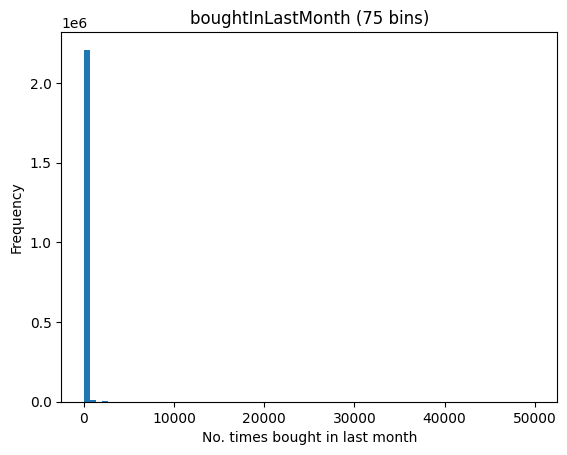

In [ ]:
plt.hist(df['boughtInLastMonth'], bins=75)

plt.title('boughtInLastMonth (75 bins)')
plt.xlabel("No. times bought in last month")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig(r"Figures\boughtInLastMonth.png", transparent=True)

plt.show()

<Axes: >

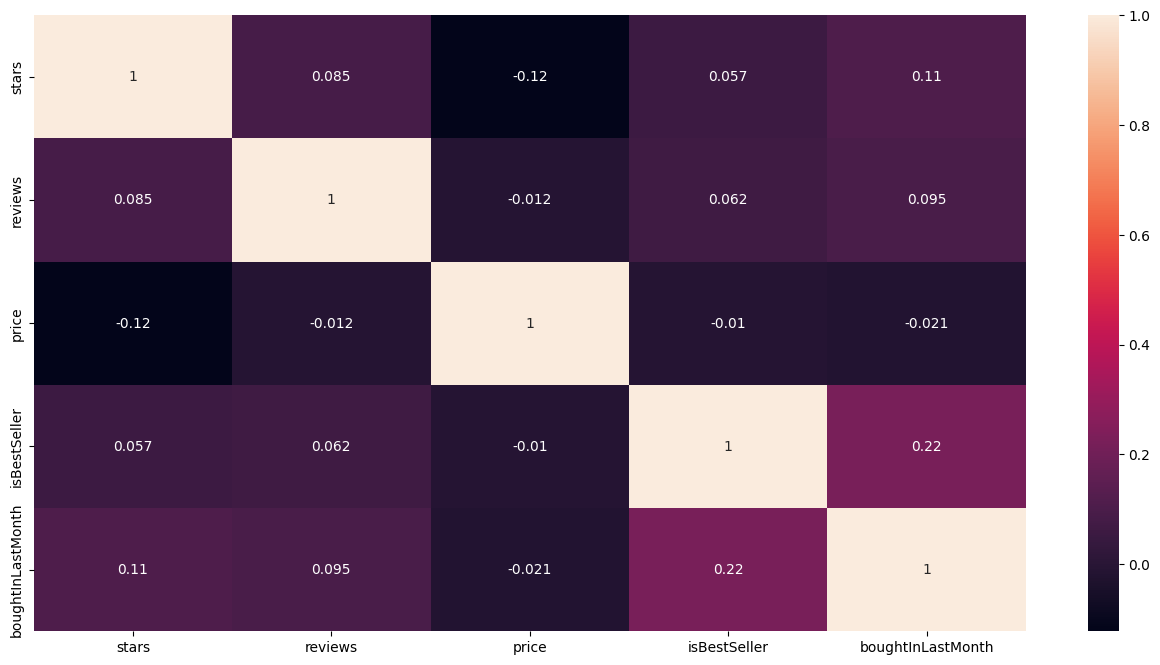

In [5]:
# Heat map from correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)

## No Nulls Exploration
From the initial data exploration, there are rigt skews on all graphs and therefore one suggestion is to only review data with 1 or more reviews. Essentially, only analysing products that have at least 1 sale.

In [4]:
nn_df = df[df["reviews"] > 0]
nn_df

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...
2222733,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2222734,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2222735,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2222740,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Rating (Stars)

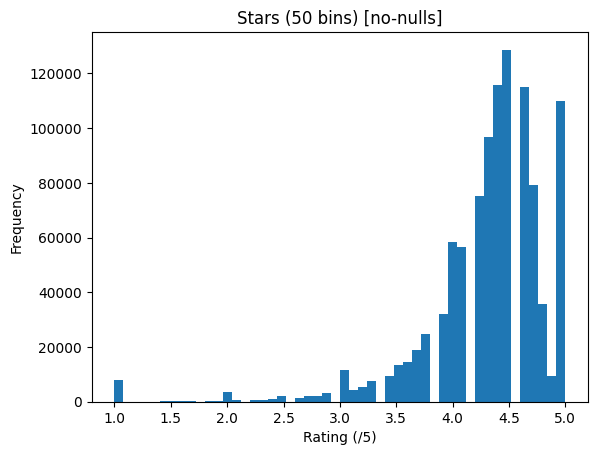

In [16]:
plt.hist(nn_df['stars'], bins=50)

plt.title('Stars (50 bins) [no-nulls]')
plt.xlabel("Rating (/5)")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig(r"Figures\nonullRatings.png", transparent=True)

plt.show()

### No. Reviews

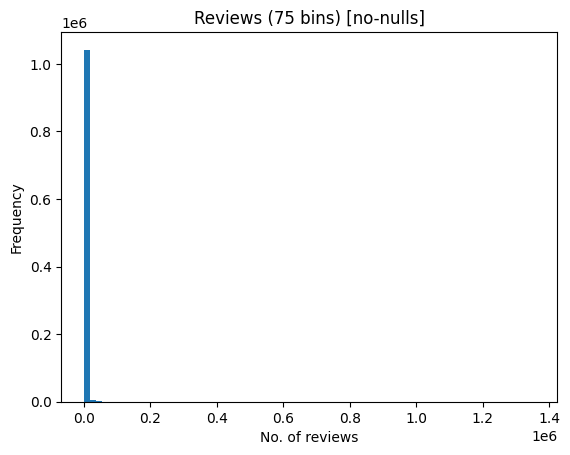

In [17]:
b = 75
plt.hist(nn_df['reviews'], bins=b)

plt.title(f'Reviews ({b} bins) [no-nulls]')
plt.xlabel("No. of reviews")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig(r"Figures\nonullReviews.png", transparent=True)

plt.show()

### Price

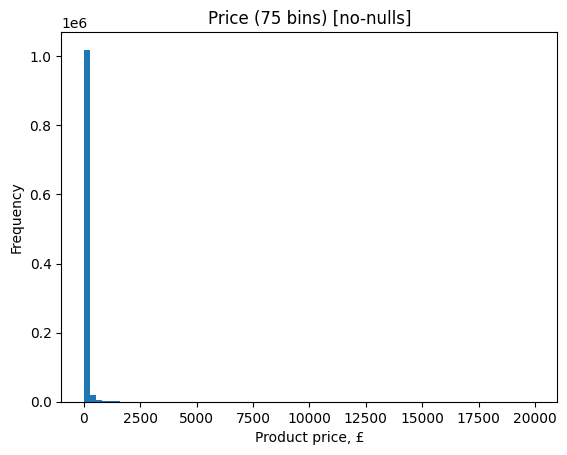

In [18]:
plt.hist(nn_df['price'], bins=75)

plt.title('Price (75 bins) [no-nulls]')
plt.xlabel("Product price, £")
plt.ylabel("Frequency")

# Save the histogram with a transparent background
plt.savefig(r"Figures\nonullsPrice.png", transparent=True)

plt.show()

In [19]:
df["price"].max()

100000.0

In [20]:
nn_df["price"].max()

19990.0

### Correlation Matrix

<Axes: >

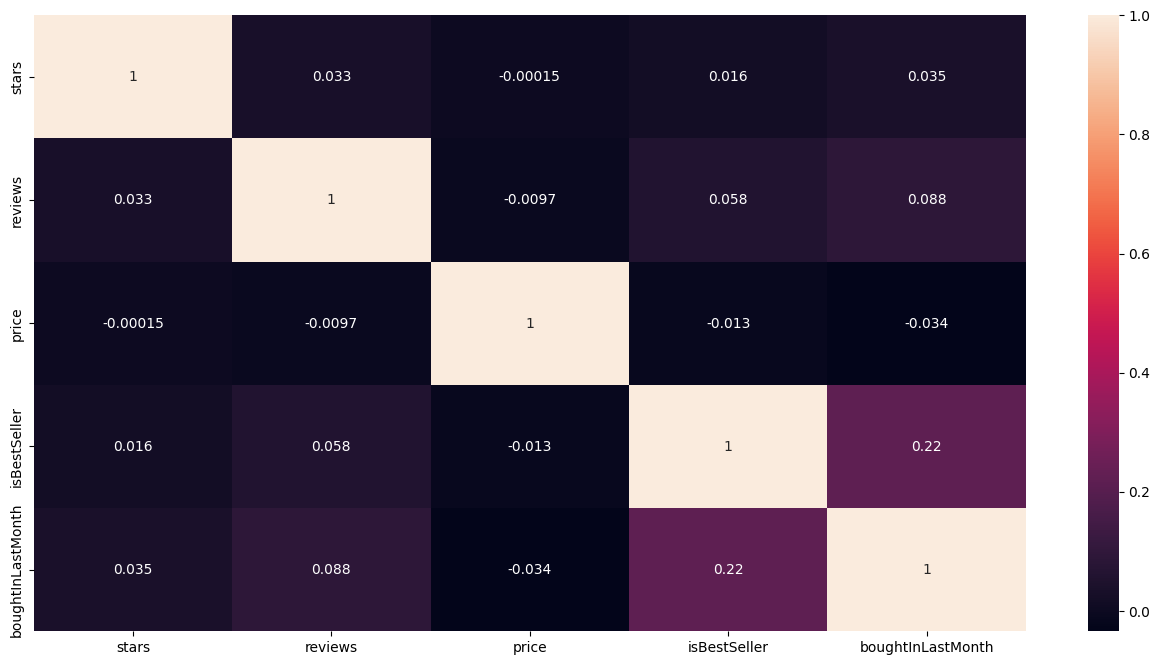

In [15]:
# Correlation matrix using data w/ no nulls
corr_matrix = nn_df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True)